# Clustering

![image.png](_images/4_ML_Algorithms/cluster_comparison.png)

Non-flat geometry clustering is sẽ hữu ích cho những cụm có hình dạng cụ thể, ví dụ như hình không phẳng và khi đó công thức khoảng cách Euclidean không đúng (hàng 1 và 2)

|Tên thuật toán|Tham số|Khả năng mở rộng|Usecase|Phương pháp sử dụng|
|:----|:----|:----|:----|:----|
|K-Means|number of clusters|Very large n_samples, medium n_clusters with MiniBatch code|General-purpose, even cluster size, flat geometry, not too many clusters, inductive|Distances between points|
|Affinity propagation|damping, sample preference|Not scalable with n_samples|Many clusters, uneven cluster size, non-flat geometry, inductive|Graph distance (e.g. nearest-neighbor graph)|
|Mean-shift|bandwidth|Not scalable with n_samples|Many clusters, uneven cluster size, non-flat geometry, inductive|Distances between points|
|Spectral clustering|number of clusters|Medium n_samples, small n_clusters|Few clusters, even cluster size, non-flat geometry, transductive|Graph distance (e.g. nearest-neighbor graph)|
|Ward hierarchical clustering|number of clusters or distance threshold|Large n_samples and n_clusters|Many clusters, possibly connectivity constraints, transductive|Distances between points|
|Agglomerative clustering|number of clusters or distance threshold, linkage type, distance|Large n_samples and n_clusters|Many clusters, possibly connectivity constraints, non Euclidean distances, transductive|Any pairwise distance|
|DBSCAN|neighborhood size|Very large n_samples, medium n_clusters|Non-flat geometry, uneven cluster sizes, outlier removal, transductive|Distances between nearest points|
|OPTICS|minimum cluster membership|Very large n_samples, large n_clusters|Non-flat geometry, uneven cluster sizes, variable cluster density, outlier removal, transductive|Distances between points|
|Gaussian mixtures|many|Not scalable|Flat geometry, good for density estimation, inductive|Mahalanobis distances to centers|
|BIRCH|branching factor, threshold, optional global clusterer.|Large n_clusters and n_samples|Large dataset, outlier removal, data reduction, inductive|Euclidean distance between points|
|Bisecting K-Means|number of clusters|Very large n_samples, medium n_clusters|General-purpose, even cluster size, flat geometry, no empty clusters, inductive, hierarchical|Distances between points|

## Kmeans
Thuật toán phân cụm dựa vào n_clusters được define trước và khoảng cách từ các điểm tới centroid của mỗi cụm. Mục tiêu của bài toán là minimize sum of squares within all clusters:
$$\sum_{i=0}^{n}\operatorname*{min}_{\mu_{j}\in C}(||x_{i}-\mu_{j}||^{2})$$

**Thuật toán**

Ban đầu thuật toán sẽ khởi tạo ngẫu nhiên một số lượng K xác định trước tâm cụm. Sau đó tiến hành xác định nhãn cho từng điểm dữ liệu và tiếp tục cập nhật lại tâm cụm. Thuật toán sẽ dừng cho tới khi toàn bộ các điểm dữ liệu được phân về đúng cụm hoặc số lượt cập nhật tâm chạm ngưỡng.
- labels: Nhãn của điểm dữ liệu dựa vào khoảng cách của điểm dó tới  các centroids, tính thông qua bình phương norm chuẩn bậc 2, L2
- updating the centroids: với mỗi 1 cluster thì tính lại các giá trị trung bình của các điểm thuộc cluster đó để xác định lại centroid mới

K-mean ko phải là model tìm the best possible solution nên có sự khác biệt nhỏ khi thuật toán lựa chọn điểm bắt đầu khác nhau, cho nên cần repeated thuật toán nhiều lần để tìm ra model tốt nhất. Tham số n_init (default = 10) là number of times the k-means algorithm is run with different centroid seeds.

__Lựa chọn số lượng k Clusters by elbow method__: method thử nghiệm nếu tăng thêm 1 cluster mới thì sự dổi của variance explain. Điểm cluster phù hợp là ở các mức số cluster tăng thêm phía sau thì độ giảm của hàm variance explain không giảm nhiều.

Những cluster có __size mất cân bằng__ so với phần còn lại có thể chỉ ra là có xuất hiện outliers hoặc các điểm trong cụm cluster đó cách xa nhau so với các cụm khác

__Hạn chế Kmean__:
- __Xác định trước số cụm cho thuật toán__: Vì bộ dữ liệu của chúng ta chưa được gán nhãn nên dường như chúng ta không có thông tin nào về số lượng cụm hợp lý. Chúng ta chỉ có thể thực hiện phương pháp thử và sai (try and error) và xác định số cụm thông qua một phương pháp chẳng hạn như Elbow.
- __Vị trí tâm của cụm sẽ bị phụ thuộc vào điểm khởi tạo ban đầu của chúng__: Những vị trí khởi tạo khác nhau có thể dẫn tới cách phân cụm khác nhau, mặc dù thuật toán có cùng thiết lập số cụm
- __Khả năng không hội tụ với dữ liệu phân bố đặc biệt__: Chẳng hạn như dữ liệu có dạng đường viền hình tròn bao ngoài một hình tròn ở bên trong nó; dữ liệu hình trôn ốc; dữ liệu có phân phối dẹt; dữ liệu bị mất cân bằng phân phối giữa các cụm.
- __Nhạy cảm với outliers__: Khi xuất hiện outliers thì thường khiến cho tâm cụm bị chệch và do đó dự báo cụm không còn chuẩn xác. Chính vì thế chúng ta cần phải loại bỏ outliers trước khi huấn luyện thuật toán.
- __Nhạy cảm với độ lớn đơn vị của biến__: Khi áp dụng thuật toán trên các biến có sự khác biệt về mặt đơn vị thì khoảng cách chủ yếu bị ảnh hưởng bởi các biến có đơn vị lớn hơn và khiến cho kết quả phân cụm bị chệch. Chính vì thế chúng ta cần phải chuẩn hoá biến để loại bỏ sự khác biệt đơn vị trước khi đưa vào huấn luyện mô hình.
- __Yêu cầu phải tính khoảng cách từ một điểm tới toàn bộ các tâm cụm__: Thuật toán k-Means yêu cầu phải tính khoảng cách từ một điểm tới toàn bộ các tâm cụm để tìm ra tâm cụm gần nhất. Như vậy chúng ta cần phải load toàn bộ dữ liệu lên RAM, đối với những bộ dữ liệu kích thước lớn thì sẽ vượt quá khả năng lưu trữ của RAM. Khi đó chúng ta cần phải huấn luyện thuật toán theo phương pháp online learning. Kĩ thuật này sẽ được giới thiệu ở bên dưới.
- __Giả định rằng các cụm có variance giống nhau và có convex shaped__

In [50]:
import numpy as np
from sklearn.datasets import make_blobs

dataset, _ = make_blobs(centers = 4, n_samples=800, cluster_std=2.5,random_state=10)

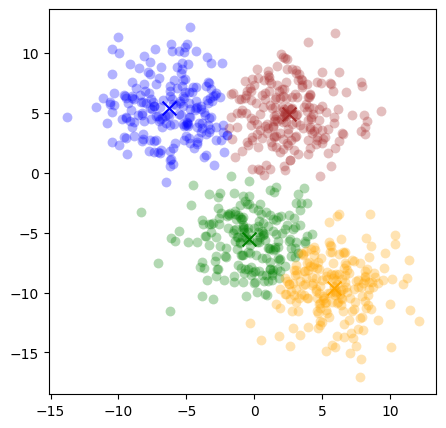

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmean_model = KMeans(n_clusters=4, n_init = 10).fit(dataset)

plt.figure(figsize = (5, 5))
colors = ['green', 'blue', 'brown', 'orange']
for i in range(len(kmean_model.cluster_centers_)):
    idx_i = (kmean_model.labels_ == i)
    plt.scatter(dataset[idx_i, 0], dataset[idx_i, 1], 
                color=colors[i], label=i, s=50, alpha=0.3, lw = 0)
    plt.scatter(kmean_model.cluster_centers_[i, 0], 
                kmean_model.cluster_centers_[i, 1], 
                marker='x', color=colors[i], s=100, label=i)

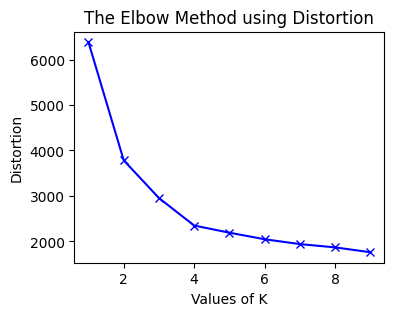

In [52]:
# Elbow trong lựa chọn số cụm

from scipy.spatial.distance import cdist

losses = []
K = 10
for i in range(1, K):
    # 1.  Huấn luyện với số cụm = i
    kmeans_i = KMeans(n_clusters=i, n_init = 10).fit(dataset)
    # 2. Tính _hàm biến dạng_
    # 2.1. Khoảng cách tới toàn bộ centroids
    d2centroids = cdist(dataset, kmeans_i.cluster_centers_, 'euclidean') # shape (n, k)
    # 2.2. Khoảng cách tới centroid gần nhất
    min_distance = np.min(d2centroids, axis=1) # shape (n)
    loss = np.sum(min_distance)
    losses.append(loss)
    
plt.figure(figsize=(4, 3))
plt.plot(np.arange(1, K), losses, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

__--> select k = 4__

__Kmean online__

$$\begin{array}{c}{{\mu_{j}:=\mu_{j}-\alpha\nabla_{\mu_{j}}Z({\bf x}_{i},\mu)}}\\ {{=\ \mu_{j}+\alpha({\bf x}_{i}-\mu_{j})}}\end{array}$$

chúng ta lựa chọn ra ngẫu nhiên một điểm dữ liệu và thực hiện cập nhật lại tâm cụm theo Gradient Descent. Cách huấn luyện mô hình trên một điểm dữ liệu như vậy còn được gọi là Stochastic Gradient Descent. Trường hợp khác khi chúng ta cũng cập nhật nghiệm theo Gradient Descent, nhưng đối với đầu vào là một batch gồm nhiều điểm dữ liệu thì được gọi là Mini-Batch Gradient Descent. Phương pháp online learning vừa đảm bảo được tính realtime và tiết kiệm chi phí tính toán nên thường được áp dụng trong thực tiễn cho nhiều thuật toán khác nhau trong machine learning, không chỉ riêng k-Means.

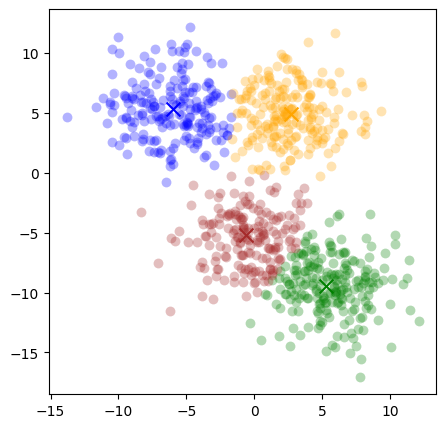

In [53]:
# The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time

from sklearn.cluster import MiniBatchKMeans

kmean_model = MiniBatchKMeans(n_clusters=4, n_init = 10, 
                              batch_size=12, reassignment_ratio=0).fit(dataset)

plt.figure(figsize = (5, 5))
colors = ['green', 'blue', 'brown', 'orange']
for i in range(len(kmean_model.cluster_centers_)):
    idx_i = (kmean_model.labels_ == i)
    plt.scatter(dataset[idx_i, 0], dataset[idx_i, 1], 
                color=colors[i], label=i, s=50, alpha=0.3, lw = 0)
    plt.scatter(kmean_model.cluster_centers_[i, 0], 
                kmean_model.cluster_centers_[i, 1], 
                marker='x', color=colors[i], s=100, label=i)

## Hierarchical Clustering

- Một dạng phân cụm mà ko cần xác định trước số lượng cluster K, ứng với mỗi một giá trị khoảng cách thì sẽ dễ dàng xác định được có bao nhiêu cụm thông qua dendrogram
- Nhạy cảm trong việc phân cụm với những records ở xa
- Chỉ phù hợp với khoảng 10k records (small datasets) vì yêu cầu lượng tính toán lớn. Không phù phợp với bigdata và scaled

__1. TERMS__
- __Dendrogram__: biểu đồ thể hiện record thuộc về cluster nào
    - __trục X__ thể hiện từng quan sát
    - __trục Y__ thể hiện thước đo sự khác biệt giữa các cụm
    
![image.png](_images/4_ML_Algorithms/Dendrogram.png)

Trong biểu đồ __dendogram__ mà bạn nhìn thấy ở trên, trục hoành (horizontal axis) là thứ tự index của các quan sát trong bộ dữ liệu gốc, trục tung (vertical axis) thể hiện mức độ khác biệt giữa các cụm được tính toán thông qua thước đo sự khác biệt, trong biểu đồ trên chính là khoảng cách cụm được tính theo phương pháp Ward linkage. Nhìn vào đồ thị dendrogram ta có thể dễ dàng xác định được rằng với cùng một giá trị mức độ khác biệt là 200 thì chúng ta có thể tạo thành 5 cụm phân biệt.
- __Dissimilarity__: Khoảng cách giữa 2 cụm clusters
- __Distance__: Khoảng cách giữa 2 records
- __tâm cluster__
    - __centroid__: Điểm đại diện cho tâm cụm, được tính bằng trung bình các điểm trọng cụm. Điểm centroid không nhất thiết phải là điểm thực tế xuất hiện trong cụm mà chỉ là điểm được tính toán TB các điểm khác thuộc cụm đó mà thôi
    - __clustroids__: Trong nhiều trường hợp khi dữ liệu không tồn tại trong không gian euclidean (non-euclidean) thì chúng ta không thể tính toán được tâm của từng cụm theo trung bình toàn bộ các điểm trong cụm. Khi đó tâm cụm sẽ được xác định là một điểm nằm trong cụm sao cho có trung bình khoảng cách tới những điểm khác trong cùng cụm là nhỏ nhất. Như vậy ta đã thay thế trung bình bằng một điểm dữ liệu thực tế, những điểm này còn được gọi là clustroids.

----
__2. THUẬT TOÁN__

Một bộ phân cấp dữ liệu size N thì trải qua N bước phân chia. Chia tlược phân chia theo thứ tự hợp nhất bottum-up (từ dưới lên trên) hoặc phân chia top-down.

__2.1. Chiến lược hợp nhất (agglomerative)__

![image.png](_images/4_ML_Algorithms/agglomerative.png)

Chiến lược này sẽ đi theo chiều bottum-up (từ dưới lên trên). Quá trình phân cụm bắt đầu ở dưới cùng tại các leaf node . Ban dầu mỗi quan sát sẽ được xem là một cụm tách biệt được thể hiện bởi một node lá. Ở mỗi level chúng ta sẽ tìm cách hợp một cặp cụm thành một cụm duy nhất nhằm tạo ra một cụm mới ở level cao hơn tiếp theo. Cụm mới này tương ứng với các node quyết định (non-leaf node). Như vậy sau khi hợp cụm thì số lượng cụm ít hơn. Một cặp được chọn để hợp nhất sẽ là những cụm trung gian không giao nhau.

Cách hợp nhất bằng việc tính khoảng cách giữa node-node, node-leaf, leaf-leaf và lựa chọn ra khoảng cách ngắn nhất. Điểm đại diện cho node là trung bình các quan sát (leafs) trong node đó (chứ ko phải trung bình leaf và node con khác).

___Phương pháp đo khoảng cách___ gồm 4 loại: 

___a. Ward linkage___

$$d({\bf m}_{1},{\bf m}_{2})=\sqrt{\sum_{i=1}^{n}(m_{i}^{(1)}-m_{i}^{(2)})^{2}}$$
Phân cụm dựa vào khả năng giảm phương sai , tức so sánh phương sai của cụm tổng và tổng phương sai của 2 cụm sau phân chia.
    - Phương sai luôn giảm sau khi phân cụm
    - Độ giảm của phương sai tỷ lệ thuận với khoảng cách tâm (centroids) giữa hai cụm. Nếu hai tâm cách xa nhau thì giá trị giảm của phương sai sau khi phân cụm càng lớn. Trái lại nếu tâm giữa hai cụm càng sát nhau, các cụm có xu hướng chồng lấn và không rõ ràng thì sau khi phân chia phương sai của cụm giảm không đáng kể.
    - phương pháp này chỉ phù hợp với không gian euclidean
    - Khoảng cách giữa 2 tâm cụm tính theo khoảng cách euclidean

___b. Sinlge linkage___

$$d({\cal S}_{1},{\cal S}_{2})=\operatorname*{min}_{{\bf x}_{i}\in{\cal S}_{1},{\bf x}_{j}\in{\cal S}_{2}}d({\bf x}_{i}^{(1)},{\bf x}_{j}^{(2)})$$

Phương pháp này đo lường sự khác biệt giữa hai cụm bằng cách lấy ra cặp điểm gần nhất giữa hai cụm. Độ đo sự khác biệt được tính theo công thức. Phương pháp này còn được gọi dưới một tên khác là nearest-neighbor. Tức là đo lường khoảng cách cụm thông qua 2 điểm gần nhau nhất thuộc mỗi cụm.

___c. Complete linkage___
$$d({\cal S}_{1},{\cal S}_{2})=\operatorname*{max}_{{\bf x}_{i}\in{\cal S}_{1},{\bf x}_{j}\in{\cal S}_{2}}d({\bf x}_{i}^{(1)},{\bf x}_{j}^{(2)})$$

Phương pháp này đo lường sự khác biệt giữa hai cụm bằng cách lấy ra hai cặp điểm xa nhau nhất giữa hai cụm

___d. Group average___

$$d({\cal S}_{1},{\cal S}_{2})=\frac{1}{N_{1}N_{2}}\sum_{i=1}^{N_{1}}\sum_{j=1}^{N_{2}}d({\bf x}_{i}^{(1)},{\bf x}_{j}^{(2)})$$

Phương pháp này sẽ lấy trung bình toàn bộ khoảng cách giữa các cặp điểm được lấy từ hai cụm. Chúng ta sẽ có tổng cộng N1N2 cặp điểm

![image.png](_images/4_ML_Algorithms/AgglomerativeClustering.png)


Cả bốn phương pháp ___ward linkage___, ___sinlge linkage___, ___complete linkage___, ___group average___ đều giúp tạo ra một thước đo về sự không tương đồng hay chính là khoảng cách giữa hai cụm. Khi giữa các cụm có sự tách biệt thể hiện qua phân phối dữ liệu và đường biên phân chia rõ rệt thì kết quả trả về d(S1,S2) đều thu được lớn và trái lại. Các đặc điểm:
- ___single linkage___ và ___complete linkage___ thường bị ảnh hưởng bởi những điểm dữ liệu ___outliers___. Chẳng hạn hai cụm rất cách xa nhau nhưng do hai điểm ___outliers___ của chúng lại rất gần nhau có thể trả về một khoảng cách theo ___single linkage___ rất bé. Một tình huống khác, khi hai cụm rất gần nhau nhưng do hai điểm ___outliers___ của chúng rất xa nên khoảng cách được đo theo ___complete linkage___ lại rất lớn
- ___ward linkage___ lại chỉ có thể hoạt động khi các điểm dữ liệu tồn tại trong không gian ___euclidean___.

__2.2. Chiến lược phân chia (divisive)__

Chiến lược này sẽ thực hiện theo chiều  top-down. Tức là phân chia bắt đầu từ node gốc của đồ thị. Node gốc bao gồm toàn bộ các quan sát, tại mỗi level chúng ta phân chia một cách đệ qui các cụm đang tồn tại tại level đó thành hai cụm mới. Phép phân chia được tiến hành sao cho tạo thành hai cụm mới mà sự tách biệt giữa chúng là lớn nhất. Sự tách biệt này sẽ được đo lường thông qua một thước đo khoảng cách mà ta sẽ tìm hiểu kĩ hơn bên dưới.

![image.png](_images/4_ML_Algorithms/divisive.png)

- Bước 1 chúng ta sẽ lựa chọn ra điểm C là điểm đầu tiên thuộc cụm mới dựa trên khoảng cách so với các điểm còn lại là xa nhất. Sau bước 1 ta thu được tập S1={C} và S2={A,B,D,E,F}. 
- Bước 2 lựa chọn trong số các điểm thuộc S2 ra điểm mà có khoảng cách xa nhất so với những điểm còn lại sao cho điểm này gần với C hơn so với các điểm thuộc tập S2, đó chính là diểm A. Di chuyển điểm này sang S1. 
- Bước 3 chúng ta lại tiếp tục thực hiện như vậy và lựa chọn được điểm B để đưa sang S1. 
- Bước 4 ta sẽ dừng quá trình chuyển cụm cho các điểm thuộc S2 vì thuật toán đã đạt sự hội tụ về hai cụm. Khi đó ta lại tiếp tục tiến hành đệ qui thuật toán trên từng cụm con.
----
__3. Điều kiện dừng thuật toán__
- Lựa chọn số K cluster tối đa
- Tính mật độ sau khi phân cụm: Thuật toán sẽ dừng nếu như việc gộp cụm tạo thành những cụm có độ gắn kết (cohension) thấp hơn bằng cách tính tỷ số giữa số lượng điểm nằm trong cụm chia cho luỹ thừa bậc hai hoặc bậc 3 của đường kính hoặc bán kính của cụm. 

In [54]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(
    n_clusters = 4,
    affinity='deprecated',
    metric=None,
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward', # {'ward', 'complete', 'average', 'single'}
    distance_threshold=None,
    compute_distances=False,
).fit(dataset)


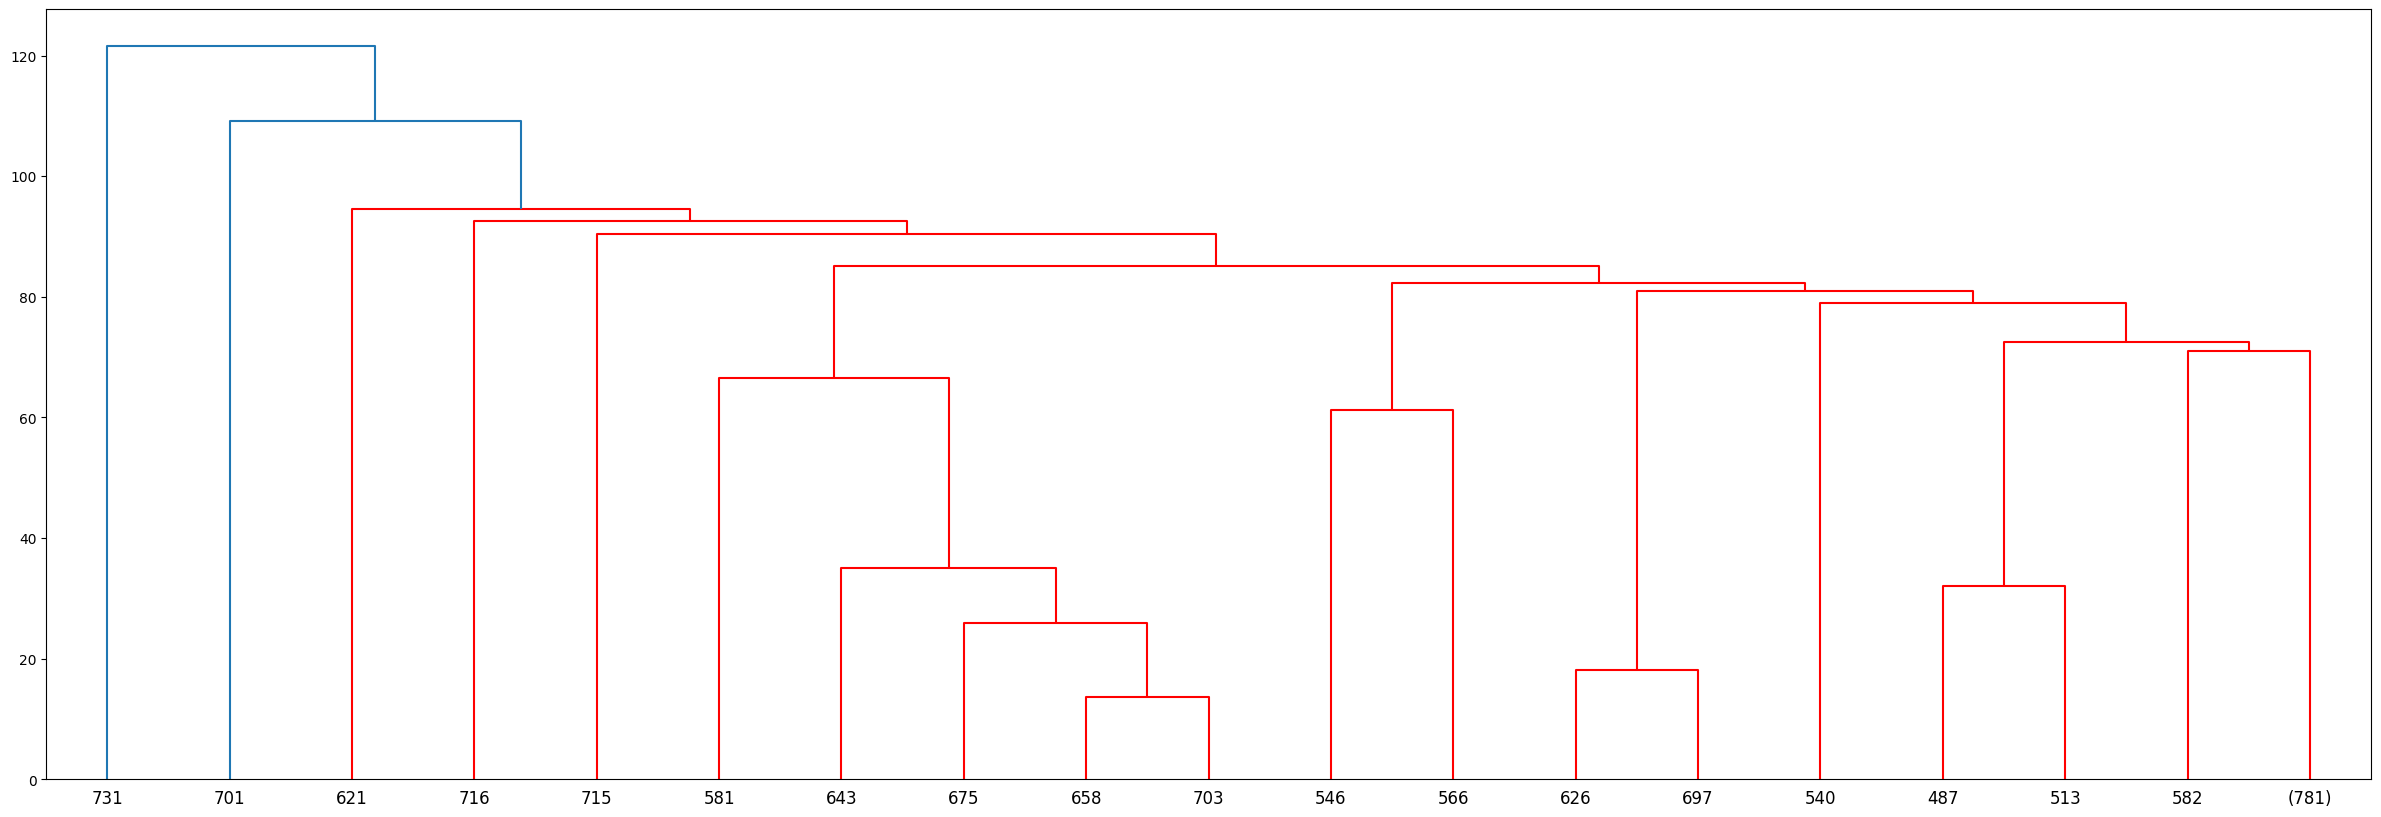

In [55]:
# plot dendrogram
from scipy.cluster import hierarchy

linkage_matrix = hierarchy.linkage(clustering.children_)

plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','grey', 'b', 'grey', 'm', 'grey', 'g', 'grey', 'orange']) # set colors for the clusters
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=10, color_threshold=100) # color_threshold=23 sets clusters below y-axis value of 23 to be of the same color

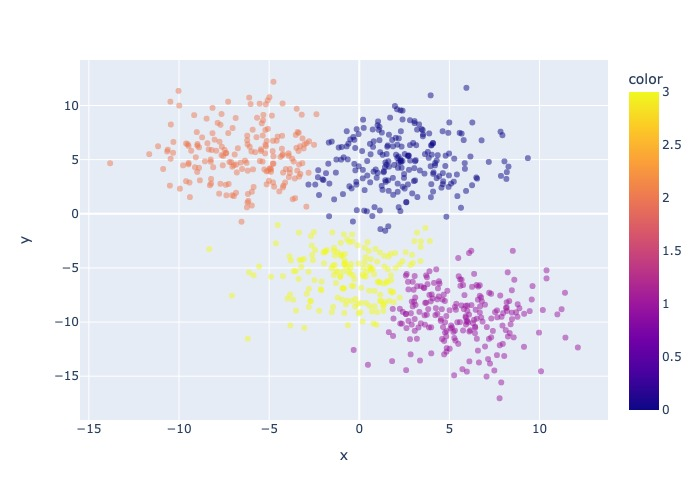

In [56]:
import plotly.express as px
fig = px.scatter(x = dataset[:,0], y = dataset[:,1], color = clustering.labels_, opacity = 0.5)
fig.show(renderer = 'jpeg')

## Density-Based Clustering (DBSCAN)

DBSCAN dựa trên ý tưởng rằng một cụm trong không gian dữ liệu là một vùng có mật độ điểm cao được ngăn cách với các cụm khác bằng các vùng liền kề có mật độ điểm thấp.

**1. Terms**
- __Vùng lân cận epsilon (Eps-neighborhood)__: Vùng lân cận __epsilon__ (Eps-neighborhood) của một điểm dữ liệu P được định nghĩa là tợp hợp tất cả các điểm dữ liệu nằm trong phạm vi bán kính __epsilon__ (kí hiệu ϵ) xung quanh điểm P.
- __Khả năng tiếp cận trực tiếp mật độ (directly density-reachable)__ của 1 điểm: Điểm Q được coi là có Khả năng tiếp cận trực tiếp mật độ  của điểm P tương ứng với 2 tham số __epsilon__ và __minPts__ nếu như nó thoả mãn hai điều kiện là Q thuộc vùng lân cận __epsilon__ của P và Số lượng điểm thuộc vùng lân cận __epsilon__ của Q là __minPts__
--> Như vậy một điểm dữ liệu có thể tiếp cận được trực tiếp tới một điểm khác không chỉ dựa vào khoảng cách giữa chúng mà còn phụ thuộc vào mật độ các điểm dữ liệu trong vùng lân cận __epsilon__ phải tối thiểu bằng __minPts__. Khi đó vùng lân cận được coi là có mật độ cao và sẽ được phân vào các cụm. Trái lại thì vùng lân cận sẽ có mật độ thấp. Trong trường hợp mật độ thấp thì điểm dữ liệu ở trung tâm được coi là không kết nối trực tiếp tới những điểm khác trong vùng lân cận và những điểm này có thể rơi vào biên của cụm hoặc là một điểm dữ liệu nhiễu không thuộc về cụm nào.

- __Khả năng tiếp cận mật độ (density-reachable)__: Khả năng tiếp cận mật độ thể hiện sự mở rộng phạm vi của một cụm dữ liệu dựa trên liên kết theo chuỗi. Xuất phát từ một điểm dữ liệu ta có thể tìm được các điểm có khả năng kết nối mật độ tới nó theo lan truyền chuỗi để xác định cụm. Nếu trong 1 tập hợp các điểm {Pi} mà trong đó điểm nào cũng tìm dc ít nhất 1 điểm trong tập hợp {Pi} có thể tiếp cận  trực tiếp mật độ theo tham số __epsilon__ và __minPts__


- __Type of points__:
    - _Core point_: các điểm nằm sâu bên trong cụm, một điểm core có ít nhất __minPts__ điểm trong vùng lân cận __epsilon__ của chính nó.
    - _Border point_: Các điểm biên nằm ở phần ngoài cùng của cụm. Đây là một điểm có ít nhất một điểm lõi nằm ở vùng lân cận __epsilon__ nhưng mật độ không đủ __minPts__ điểm.
    - _Noise point_: điểm nhiễu không thuộc bất kì một cụm nào. Đây là điểm không phải là điểm lõi hay điểm biên
![image.png](_images/4_ML_Algorithms/dbscan_type_point.png)

- __Cặp điểm P-Q__: xảy ra 3 TH sau
    - _P và Q cùng cụm_: Cả 2 điểm đều có khả năng kết nối mật độ được với nhau, khi đó 2 điểm này thuộc cùng 1 cụm
    - _Core P, Border Q_: P có khả năng kết nối mật độ được với Q, nhưng ngược lại thì không
    - _P và Q khác cụm hoặc 1 trong 2 là noise_: P và Q đều ko kết nối mật độ được với nhau
----
**2. Thuật toán**
- __Bước 1__: Thuật toán lựa chọn một điểm dữ liệu bất kì. Sau đó tiến hành xác định các điểm lõi và điểm biênthông qua vùng lân cận __epsilon__ bằng cách lan truyền theo liên kết chuỗi các điểm thuộc cùng một cụm.
- __Bước 2__: Cụm hoàn toàn được xác định khi không thể mở rộng được thêm. Khi đó lặp lại đệ qui toàn bộ quá trình với điểm khởi tạo trong số các điểm dữ liệu còn lại để xác định một cụm mới.
----
**3. Hyperparameters**
- a. __epsilon__ (__ϵ__): Một giá trị khoảng cách được sử dụng để xác định vùng lân cận __epsilon__ của bất kỳ điểm dữ liệu nào. Giá trị __ϵ__ có thể được chọn bằng cách vẽ một biểu đồ __k-distance__. Đây là biểu đồ thể hiện giá trị khoảng cách trong thuật toán k-Means clustering đến __k = minPts − 1__ điểm láng giềng gần nhất. Ứng với mỗi điểm chúng ta chỉ lựa chọn ra khoảng cách lớn nhất trong k khoảng cách. Những khoảng cách này trên đồ thị được sắp xếp theo thứ tự giảm dần. Các giá trị tốt của __ϵ__ là vị trí mà biểu đồ này cho thấy xuất hiện một điểm khuỷ tay (__elbow point__): Nếu __ϵ__ được chọn quá nhỏ, một phần lớn dữ liệu sẽ không được phân cụm và được xem là nhiễu; trong khi đối với giá trị __ϵ__ quá cao, các cụm sẽ hợp nhất và phần lớn các điểm sẽ nằm trong cùng một cụm. Nói chung, các giá trị nhỏ của __ϵ__ được ưu tiên hơn và theo quy tắc chung, chỉ một phần nhỏ các điểm nên nằm trong vùng lân cận epsilon.
    - Lựa chọn epsilon theo k-distance: Từ biểu đồ k-distance chúng ta có thể thấy điểm elbow tương ứng với __ϵ__ ∈ [0.12,0.16].
    
    ![image.png](_images/4_ML_Algorithms/dbscan_k_dis.png)
    
    
- b. __minPts__: (= `min_samples`) Là một ngưỡng số điểm dữ liệu tối thiểu được nhóm lại với nhau nhằm xác định một vùng lân cận epsilon có mật độ cao. Số lượng __minPts__ không bao gồm điểm ở tâm.
    - Theo quy tắc chung, __minPts__ tối thiểu có thể được tính theo số chiều D trong tập dữ liệu, đó là __minPts__ >= D+1 và __minPts__ >= 3
    - Các giá trị lớn hơn của __minPts__ sẽ tốt hơn cho dữ liệu có nhiều noise
    - Nên chọn __minPts__ = 2*D hoặc giao động xung quanh gtri này phụ thuộc vào tỷ lệ noise
- c. __Distance function__:
    - Hamming distance:
    - Gower Distance: Useful for mix-datatype numeric and category. Gower Similarity tính trung bình partial similarities (ps) thông qua m features của 2 quan sát (khác với xét tính tương đồng thông qua 1 feature)
        - ps cho categorical feature: bằng 1 nếu 2 value khác nhau, 0 nếu giống nhau

        
----
**4. Ứng dụng**
- DBSCAN là một thuật toán đơn giản và hiệu quả.  
- Ưu điểm của thuật toán đó là có thể tự động loại bỏ được các điểm dữ liệu nhiễu, hoạt động tốt đối với những dữ liệu có hình dạng phân phối đặc thù và có tốc độ tính toán nhanh. Đối với thuật toán DBSCAN thì các điểm dữ liệu outliers sẽ tự động được tách khỏi cụm nên thuật toán không chịu ảnh hưởng nhiều bởi outliers như k-Means Clustering. Chúng ta có thể bỏ qua bước loại bỏ outliers cho bộ dữ liệu.
- Tuy nhiên DBSCAN thường không hiệu quả đối với những dữ liệu có phân phối đều khắp nơi. 
- Khi huấn luyện DBSCAN thì các tham số của mô hình như khoảng cách `epsilon`, số lượng điểm lân cận tối thiểu `minPts` và hàm khoảng cách là những tham số có ảnh hưởng rất lớn đối với kết quả phân cụm. Thực tế cho thấy thuật toán khá nhạy với tham số `epsilon` và `minPts` nên chúng ta cần phải lựa chọn tham số cho mô hình trước khi tiến hành xây dựng mô hình.

In [57]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)
X.shape

(750, 2)

Chúng ta nhận thấy rằng các trường dữ liệu có sự khác biệt về độ lớn đơn vị giữa các biến nên tiếp theo cần chuẩn khoá dữ liệu để đồng nhất đơn vị giữa chúng. Chúng ta chuẩn hoá MinMaxScaler(). Đối với thuật toán DBSCAN thì các điểm dữ liệu outliers sẽ tự động được tách khỏi cụm nên thuật toán không chịu ảnh hưởng nhiều bởi outliers như k-Means Clustering. Chúng ta có thể bỏ qua bước loại bỏ outliers cho bộ dữ liệu.

Tiếp theo chúng ta sẽ sử dụng biểu đồ k-distance như đã trình bày ở mục xác định tham số để lựa chọn khoảng cách ϵ phù hợp cho mô hình DBSCAN. Không mất đi tính chất của khoảng cách của dữ liệu thì chúng ta giả định hàm khoảng cách được lựa chọn là euclidean distance. Cuối cùng chúng ta lựa chọn số lượng điểm dữ liệu tối thiểu nằm trong vùng lân cận là minPts=11 (theo nguyên tắc chung thì minPts cần tối thiểu bằng 2×dim của bộ dữ liệu). Điều này tương ứng với trong thuật toán k-Means mà chúng ta áp dụng để vẽ biểu đồ k-distance thì cần lựa chọn số láng giềng k=3. ( = minPts - 1 = 2×dim - 1)

Khi xây dựng mô hình với những tham số này sẽ tạo ra được những cụm phân chia có tính chất tổng quát nhất. Tránh được các trường hợp có quá nhiều cụm nhỏ lẻ được phân chia và nhiễu được tạo thành khi ϵ nhỏ và trường hợp khác là toàn bộ các điểm bị phân về một cụm nếu lựa chọn ϵ lớn.

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

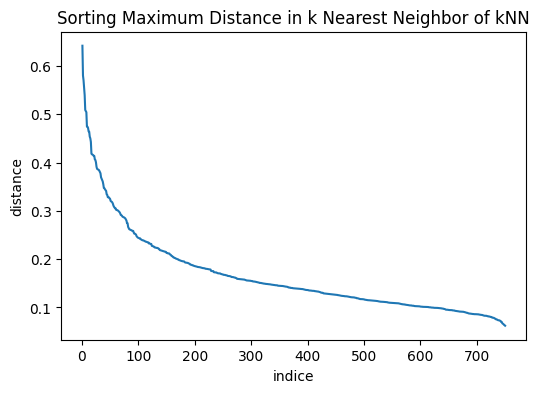

In [58]:
# lua chon tham so thong qua biểu đồ k-distance
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

std = StandardScaler()
X_std = std.fit_transform(X)

# Xây dựng mô hình k-Means với k=3
neighbors = 9
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_std)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(X_std)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(6, 4))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

lựa chọn epsilon  = 0.3

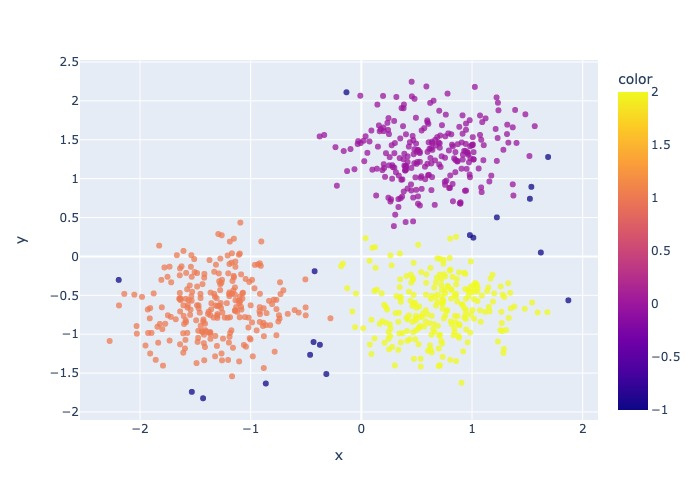

In [59]:
dbscan = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
labels = dbscan.fit_predict(X_std)
fig = px.scatter(x = X_std[:,0], y = X_std[:,1], color = labels, opacity = 0.75)
fig.show(renderer = 'jpeg')

## Gaussian Mixture Clustering
Mixture of normal model là một mô hình phân cụm thuộc lớp bài toán học không giám sát mà phân phối xác suất của mỗi một cụm được giả định là phân phối Gassian đa chiều. Sở dĩ mô hình được gọi là Mixture là vì xác suất của mỗi điểm dữ liệu không chỉ phụ thuộc vào một phân phối Gaussian duy nhất mà là kết hợp từ nhiều phân phối Gaussian khác nhau từ mỗi cụm.

--> mục tiêu của model là ước lượng tham số của từng cụm Normal phù hợp nhất trong số k cụm, kèm theo giả định của model

**Assumption**: mỗi cụm đều theo phân phối multivariate Gaussian và có tham số đặc trưng riêng theo rừng cụm

**Phương pháp cập nhật nghiệm** 
Phương pháp cập nhật nghiệm theo từng quan sát để tìm ra tham số cho các phân phối của các multivariate normal
- E-step: Mục tiêu của bước E-Step là tính xác suất của mỗi điểm dữ liệu dựa vào phân phối Gaussian đa chiều dựa trên tham số θt của vòng lặp gần nhất
- M-step: chúng ta cần cập nhật lại tham số phân phối theo hàm auxiliary Q(θ,θt). Cực trị đạt được khi đạo hàm bậc nhất bằng 0

**Đánh giá model**

chỉ số __BIC__ (Bayesian Information Criteria) là chỉ số đo lường mức độ hợp lý của mô hình đối với một bộ tham số được tính dựa trên giá trị tối đa của hàm hợp lý.

$$\mathrm{BIC}=k\ln(n)-2\ln(\hat{L})$$

Với 
- `k` là số lượng tham số được ước lượng từ mô hình
- `n` là số lượng quan sát của bộ dữ liệu
- `L^` là giá trị ước lượng tối đa của hàm hợp lý. 

Chỉ số BIC là một trong những giá trị quan trọng thường được sử dụng để đánh giá và lựa chọn các mô hình khác nhau. Mô hình có BIC càng nhỏ thì mức độ hợp lý của mô hình đối với bộ dữ liệu càng cao. Chúng ta sẽ huấn luyện mô hình GMM với nhiều tham số n_components và tìm ra giá trị có BIC là nhỏ nhất. Đó chính là số lượng thành phần phù hợp nhất của bộ dữ liệu được tính theo mô hình GMM.

__Hyperparameters__
- `n_components`: Là số lượng cụm mà chúng ta cần phân chia
- `covariance_type`: Định dạng covariance được sử dụng trong thuật toán GMM. Trong đó bao gồm: {'full', 'tied', 'diag', 'spherical'}
    - ‘full’ mặc định có nghĩa rằng mỗi một thành phần cụm có một ma trận hiệp phương sai riêng. 
    - ‘tied’ được lựa chọn khi chúng ta muốn đồng nhất ma trận hiệp phương sai giữa các cụm. 
    - ‘diag’ tương ứng với ma trận hiệp phương sai là ma trận đường chéo
    - ‘spherical’ là mỗi một thành phần cụm sẽ có một phương sai riêng.
- `tol`: Ngưỡng hội tụ của thuật toán EM. Nếu mức độ cải thiện của hàm mục tiếu thấp hơn ngưỡng này thì mô hình sẽ dừng.
- `max_iter`: Số lượng vòng lặp tối đa của thuật toán EM.
- `init_params`: Lựa chọn khởi tạo tham số cho mô hình lúc ban đầu. Mặc định mô hình sẽ sử dụng khởi tạo từ thuật toán k-Means clustering. Như vậy sau mỗi vòng lặp thì thuật toán sẽ sửa lỗi của k-Means và tạo ra một kết quả với mức độ hợp lý cao hơn so với k-Means.

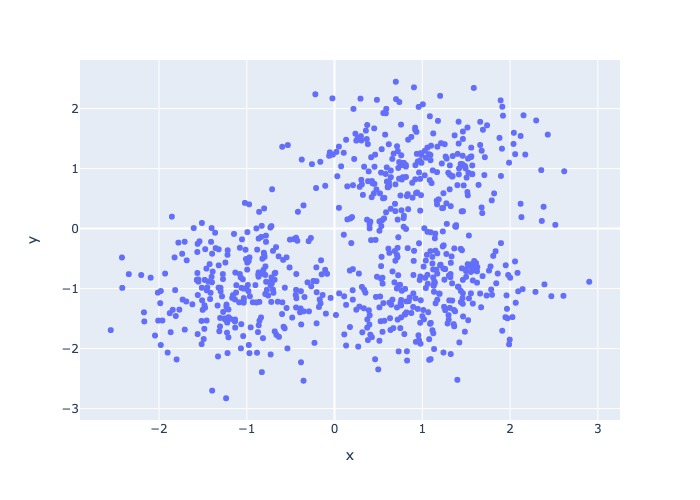

In [60]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.6, random_state=0
)
px.scatter(x=X[:,0], y=X[:,1]).show(renderer = 'jpeg')

BIC =  4191.17605781309


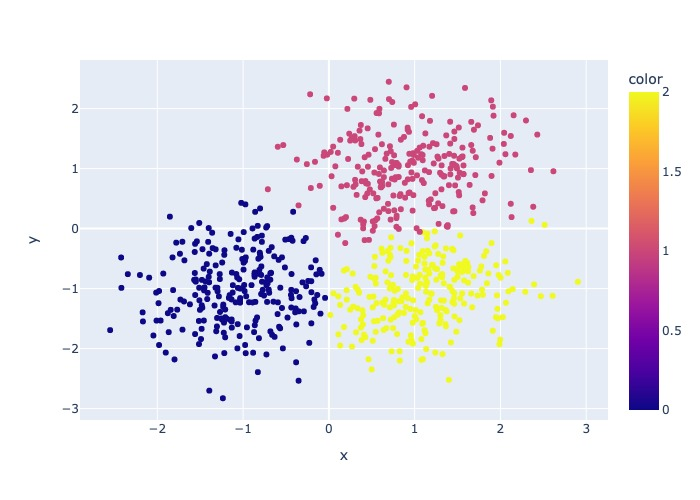

In [61]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

print("BIC = ", gmm.bic(X))

# plot
px.scatter(x=X[:,0], y=X[:,1], color=gmm.predict(X)).show(renderer = 'jpeg')

# Decomposing components 

In [62]:
# updating

# Manifold learning

In [63]:
# updating

# Novelty and Outlier Detection

In [64]:
# updating

# Neural network

In [65]:
# updating